# Pyber HW Assignment
* Pyber fares increase in less populus areas such as rural communities as opposed to urban/suburban communities. Also, the number of drivers in rural areas is significantly lower than those found in urban areas.
* A bulk of the business is urban-centered in the sense that a majority of all company rides (67.5%) and company drivers (77.8%) are in the urban environment. As a result, the needs of the urban customer should be the focus of the company when marketting Pyber's services.
* The rural market serves as a very small fraction of Pyber's customer base while the Urban market dominates in both drivers and riders. The Suburban market represents nearly a third of all fare profit and total rides while only having approximately 20% of the total drivers.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
file1 = '../raw_data/ride_data.csv'
file2 = '../raw_data/city_data.csv'
ride_df = pd.read_csv(file1)
city_df = pd.read_csv(file2)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [3]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
merged_df = pd.merge(ride_df, city_df, how='left', on=['city'])
merged_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban
5,New Jeffrey,2016-02-22 18:36:25,36.01,9757888452346,58,Urban
6,Port Johnstad,2016-06-07 02:39:58,17.15,4352278259335,22,Urban
7,Jacobfort,2016-09-20 20:58:37,22.98,1500221409082,52,Urban
8,Travisville,2016-01-15 17:32:02,27.39,850152768361,37,Urban
9,Sandymouth,2016-11-16 07:27:00,21.61,2389035050524,11,Urban


In [5]:
bubble_chart = city_df
avg_fare = ride_df[["city","fare"]].groupby(["city"]).mean()
avg_fare = avg_fare.reset_index()
avg_fare["fare"] = avg_fare["fare"].apply('{:.2f}'.format)
avg_fare_df = pd.DataFrame(avg_fare)
grouped_rides = ride_df.groupby(["city"])
ride_count = grouped_rides["ride_id"].count()
ride_count_df = pd.DataFrame(ride_count)
ride_count_df = ride_count_df.reset_index()
bubble_chart = pd.merge(bubble_chart, avg_fare_df, how='left', on=['city'])
bubble_chart = pd.merge(bubble_chart, ride_count_df, how='left', on=['city'])
bubble_chart = bubble_chart.rename(columns={ "city" : "City",
                                             "driver_count" : "Driver Count",
                                             "type" : "Type",
                                             "fare" : "Average Fare ($)",
                                             "ride_id": "Ride Count"})
color_dict = {"Urban": "gold", "Suburban": "lightskyblue", "Rural": "lightcoral"}
bubble_chart['Color'] = bubble_chart['Type'].map(color_dict)
bubble_chart.head(10)


,City,Driver Count,Type,Average Fare ($),Ride Count,Color
0,Kelseyland,63,Urban,21.81,28,gold
1,Nguyenbury,8,Urban,25.90,26,gold
2,East Douglas,12,Urban,26.17,22,gold
3,West Dawnfurt,34,Urban,22.33,29,gold
4,Rodriguezburgh,52,Urban,21.33,23,gold
5,South Josephville,4,Urban,26.82,24,gold
6,West Sydneyhaven,70,Urban,22.37,18,gold
7,Travisville,37,Urban,27.22,23,gold
8,Torresshire,70,Urban,24.21,26,gold
9,Lisaville,66,Urban,28.43,28,gold


# Bubble Chart
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

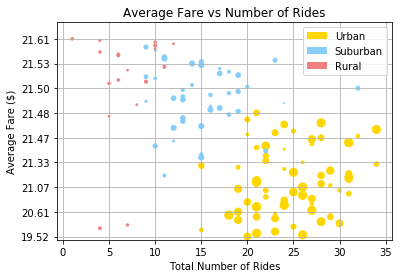

In [6]:
import matplotlib.patches as mpatches
avg_fare = bubble_chart["Average Fare ($)"]
tot_rides = bubble_chart["Ride Count"]
tot_drive = bubble_chart["Driver Count"]
colors = bubble_chart["Color"]
labels = bubble_chart["Type"]
plt.scatter(x = tot_rides, y = avg_fare, s = tot_drive, c = colors, marker="o")
plt.legend(('Urban', 'Suburban', 'Rural'))
plt.ylim(-2,130)
plt.yticks(np.arange(0, 130, step=15))
plt.grid()
classes = ['Urban', 'Suburban', 'Rural']
class_colours = ["gold", "lightskyblue", "lightcoral"]
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes)
plt.title("Average Fare vs Number of Rides")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare ($)")
plt.show()

# Pie Charts
* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

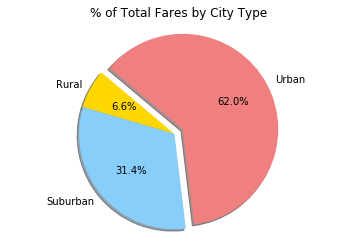

In [7]:
total_fares = merged_df[["type","fare"]].groupby(["type"]).sum()
total_fares = total_fares.reset_index()
fares = total_fares["fare"]
labels = total_fares["type"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.1]
plt.pie(fares, shadow=True, explode = explode, colors = colors, labels=labels,
        autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

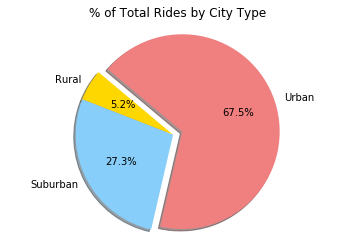

In [8]:
rides = bubble_chart[["Type","Ride Count"]].groupby(["Type"]).sum()
rides = rides.reset_index()
labels = rides["Type"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.1]
plt.pie(rides["Ride Count"], shadow=True, explode = explode, colors = colors, labels=labels,
        autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

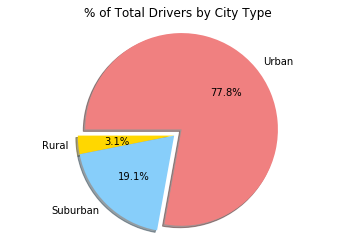

In [9]:
driver_c = bubble_chart[["Type","Driver Count"]].groupby(["Type"]).sum()
driver_c = driver_c.reset_index()
labels = driver_c["Type"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.1]
plt.pie(driver_c["Driver Count"], shadow=True, explode = explode, colors = colors, labels=labels,
        autopct="%1.1f%%", startangle=180)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()